<p align="center">
    <span style="font-size:18pt">
    Jupyter notebook for calculating the data of systems in <code>systems_list.json</code> file.</br>
    Calculated data is used in backup experiment of mdl-developed antisolvent screening method.
    </span>
</p>

In [11]:
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [7]:
# Load system list
with open("./systems_list.json", "r") as systems_json:
    systems_list = json.load(systems_json)

In [8]:
# Load component properties
with open("./properties.json", "r") as properties_json:
    properties = json.load(properties_json)

In [9]:
system = tc()
# Iterate through systems
for sys in systems_list:
    system.add_solute(**properties[sys["solute"]])
    system.add_solvent(**properties[sys["solvent"]])

    # Generate calculation data for each antisolvent
    for antisolvent in sys["antisolvent"]:
        system.add_antisolvent(**properties[antisolvent])
        calculator = ac(system, trace=False)
        _ = calculator.get_data(
            export="csv",
            file_name=f"./data/{system.mole_name[0]}_{system.mole_name[1]}_{system.mole_name[2]}.csv",
        )
        system.clear_antisolvent()

    system.clear_solute()
    system.clear_solvent()

System: SUCCINIC_ACID-n,n-dimethylformamide-TOLUENE
Initializing system...


Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-ACETIC_ACID
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-N-HEXANE
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-CYCLOHEXANE
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-1-HEXENE
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-WATER
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-METHANOL
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-ETHANOL
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-ACETONITRILE
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-ACETONE
Initializing system...
Initialize complete!
System: SUCCINIC_ACID-n,n-dimethylformamide-1-BUTANOL
Initializing system...
Initialize complete!
Sys

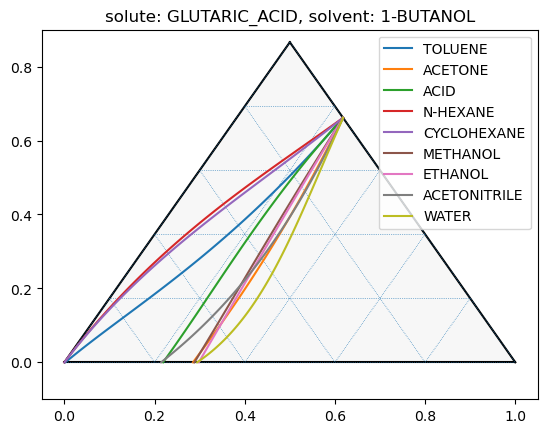

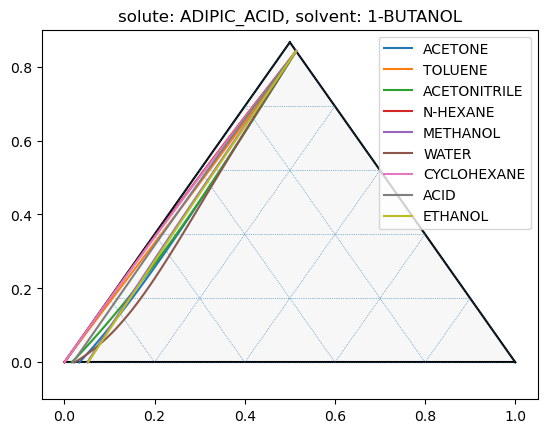

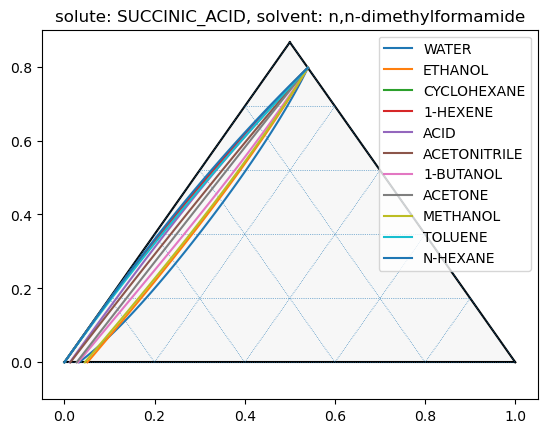

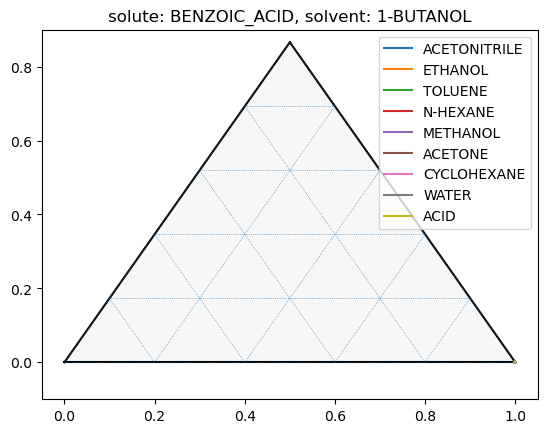

In [22]:
# Plot systems on ternary diagram
data_files = os.listdir("./data")
num_systems = len(systems_list)
for sys in systems_list:
    data_with_solute = [file for file in data_files if sys["solute"] in file]
    fig, tax = ternary.figure(scale=1.0)
    tax.boundary()
    tax.gridlines(multiple=0.2)
    tax.set_title(f"solute: {sys['solute']}, solvent: {sys['solvent']}")
    for file in data_with_solute:
        data = pandas.read_csv("./data/" + file)
        components = file.split("_")  # Notice that 'ACID' is also split here
        # Notice that values must be extracted from DataFrame
        # tax.plot() only takes array-like input
        ternary_data = data.iloc[:, -3:].astype(float).values
        tax.plot(ternary_data, linewidth=1.5, label=f"{components[-1][:-4]}")
    tax.legend(loc="upper right")
    fig.savefig(f"./plots/ternary_diagram_{sys['solute']}_{sys['solvent']}.png")